In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec
from mpl_toolkits.axes_grid1 import make_axes_locatable
%matplotlib inline

In [4]:
def softmax(x):
    """Compute softmax values for each sets of scores in x."""
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [5]:
def display(input_data, output_data, state_params):
    """Displays a matplotlib plot visualizing the given data.
    
    Args:
        input_data:
        output_data:
        state_params:
    """
    ax_input = plt.subplot2grid((40, 1), (0, 0), rowspan=5)
    ax_output = plt.subplot2grid((40, 1), (5, 0), rowspan=5)
    ax_memory = plt.subplot2grid((40, 1), (10, 0), rowspan=20)
    ax_free_gate = plt.subplot2grid((40, 1), (30, 0), rowspan=5)
    ax_alloc_gate = plt.subplot2grid((40, 1), (35, 0), rowspan=5)
    
    ax_input.set_ylabel("Inputs", rotation=0, labelpad=22)
    ax_input.imshow(np.squeeze(input_data.T), cmap=plt.cm.gray, interpolation='nearest')
    ax_input.set_xticks([])
    ax_input.set_yticks([])
    
    ax_output.set_ylabel("Outputs", rotation=0, labelpad=25)
    ax_output.imshow(np.squeeze(output_data.T), cmap=plt.cm.gray, interpolation='nearest')
    ax_output.set_xticks([])
    ax_output.set_yticks([])
    
    rw = np.array(state_params['read_weights'])
    ww = np.array(state_params['write_weights'])
    colored_read_write = np.zeros((rw.shape[0], rw.shape[1], 3))
    for i in range(rw.shape[0]):
        for j in range(rw.shape[1]):
            if rw[i, j] > ww[i, j]:
                colored_read_write[i, j] = [rw[i, j], 0., 0.]
            else:
                colored_read_write[i, j] = [0., ww[i, j], 0.]
            
    ax_memory.set_ylabel("Memory Location")
    ax_memory.imshow(np.transpose(colored_read_write, [1, 0, 2]), interpolation='nearest')
    ax_memory.set_xticks([])
    ax_memory.set_yticks([0, 5, 10])
    write_legend = mpatches.Rectangle((1, 1), 1, 1, color='green', label='Write Head')
    read_legend = mpatches.Rectangle((1, 1), 1, 1, color='red', label='Read Head')
    ax_memory.legend(bbox_to_anchor=(0.3, -0.05), handles=[write_legend, read_legend])

    free_gate = np.vstack([np.squeeze(state_params['free_gate'])] * 5)
    ax_free_gate.set_ylabel("Free gate", rotation=0, labelpad=30)
    ax_free_gate.imshow(free_gate, cmap=plt.cm.gray, interpolation='nearest')
    ax_free_gate.set_xticks([])
    ax_free_gate.set_yticks([])
    
    allocation_gate = np.vstack([np.squeeze(state_params['allocation_gate'])] * 5)
    ax_alloc_gate.set_ylabel("Alloc. gate", rotation=0, labelpad=30)
    ax_alloc_gate.imshow(allocation_gate, cmap=plt.cm.gray, interpolation='nearest')
    ax_alloc_gate.set_xticks([])
    ax_alloc_gate.set_yticks([])
    
    plt.subplots_adjust(top=2.0, bottom=1.0)
    plt.savefig('repeat_copy_figure.png', bbox_inches='tight', dpi=300)
    plt.show()

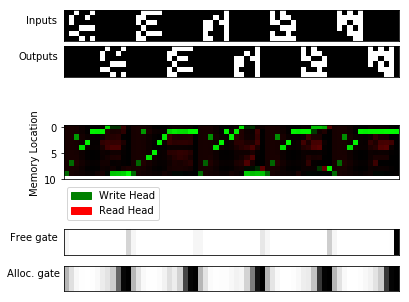

In [8]:
"""
DNC Repeat Copy Task:
Memory size = 10,
Word size   = 3
"""
# shape = (13, 1, 8)
obs = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
])
# shape = (13, 1, 7)
output = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [1.0, 0.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 1.0, 0.0, 1.0, 0.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 1.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
])
# shape = (14, 1, 10)
rw = np.array([
    [0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614, 0.0896614],
    [0.0947933, 0.0947933, 0.0947933, 0.0947933, 0.0947933, 0.0947934, 0.0948016, 0.0953539, 0.0947933, 0.0951662],
    [0.089436, 0.0894634, 0.0909088, 0.0894355, 0.0894378, 0.0895923, 0.0979449, 0.127225, 0.0894352, 0.0775676],
    [0.0542354, 0.057035, 0.0808214, 0.0541612, 0.0661964, 0.0541982, 0.0564239, 0.074523, 0.0541597, 0.0614255],
    [0.0127941, 0.0121269, 0.0433583, 0.0245532, 0.0554468, 0.0128784, 0.0126475, 0.0355632, 0.0128792, 0.0374667],
    [0.0053227, 0.00676246, 0.0312978, 0.021381, 0.0254356, 0.00535885, 0.00535526, 0.021959, 0.00514602, 0.0266698],
    [0.00908078, 0.0228997, 0.0210948, 0.0220332, 0.0275756, 0.00907304, 0.00991706, 0.0242519, 0.00906588, 0.0643609],
    [0.0520007, 0.257308, 0.0490219, 0.183914, 0.0964159, 0.0534312, 0.0444653, 0.0740479, 0.0527569, 0.0920537],
    [0.0390695, 0.128888, 0.12782, 0.218832, 0.2462, 0.0395177, 0.0805295, 0.0742615, 0.0397582, 0.00437183],
    [0.0114411, 0.0956823, 0.144337, 0.197116, 0.28538, 0.0633494, 0.110292, 0.0250297, 0.0641831, 0.0030807],
    [0.0125364, 0.103369, 0.157057, 0.200571, 0.283918, 0.0658138, 0.120866, 0.0339698, 0.0159721, 0.00590084],
    [0.22122, 0.173254, 0.0128177, 0.115036, 0.0414765, 0.0231275, 0.012933, 0.0124438, 0.0873307, 0.300319],
    [0.0247333, 0.00130671, 7.55505e-05, 0.000448288, 0.000194257, 0.000212988, 6.7591e-05, 0.00019636, 0.116481, 0.855613],

    [0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637, 0.0896637],
    [0.0941901, 0.0941901, 0.0941901, 0.0941901, 0.0941901, 0.0941903, 0.0941995, 0.0948176, 0.0941901, 0.0945625],
    [0.0876299, 0.0893929, 0.0875976, 0.087597, 0.0875996, 0.087775, 0.0971215, 0.12765, 0.0875967, 0.0752546],
    [0.0678216, 0.10339, 0.0577015, 0.0575086, 0.0575096, 0.0575598, 0.0712739, 0.0804059, 0.0575049, 0.0618088],
    [0.0184621, 0.0496199, 0.0196953, 0.0198499, 0.0194338, 0.0323313, 0.0692628, 0.0435665, 0.0200813, 0.045733],
    [0.00759921, 0.0399402, 0.007401, 0.00929679, 0.00724302, 0.0322807, 0.034521, 0.0272734, 0.00865193, 0.0325918],
    [0.0130059, 0.0279396, 0.0117656, 0.0466754, 0.011846, 0.0400223, 0.0398768, 0.0295957, 0.0198862, 0.0781765],
    [0.0325767, 0.0454948, 0.216504, 0.204222, 0.0456811, 0.160741, 0.0834171, 0.0635629, 0.0799271, 0.0447302],
    [0.0558664, 0.0725556, 0.124314, 0.163385, 0.0499138, 0.167978, 0.140742, 0.107509, 0.0942614, 0.0229711],
    [0.0557701, 0.0438618, 0.110201, 0.170561, 0.0470612, 0.192345, 0.178311, 0.0963971, 0.0997077, 0.00552182],
    [0.0543873, 0.0569963, 0.118221, 0.173522, 0.0451041, 0.184028, 0.15373, 0.119847, 0.087907, 0.0061262],
    [0.0441497, 0.156821, 0.132849, 0.15836, 0.0369946, 0.144701, 0.0978689, 0.149096, 0.06708, 0.0119366],
    [0.000152766, 0.991887, 0.000944777, 0.000936416, 0.000199086, 0.000967902, 0.000702448, 0.000457546, 0.000271688, 0.00069086],
    
    [0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604, 0.0896604],
    [0.0939196, 0.0939196, 0.0939196, 0.0939196, 0.0939196, 0.0939197, 0.093929, 0.0945516, 0.0939196, 0.0942914],
    [0.0887953, 0.0888207, 0.0902351, 0.0887949, 0.0887977, 0.0889823, 0.0986757, 0.127646, 0.0887946, 0.0760849],
    [0.0533044, 0.0540114, 0.076033, 0.0533155, 0.0650068, 0.05335, 0.0553862, 0.0722649, 0.0533156, 0.0632332],
    [0.0139201, 0.0126195, 0.0412177, 0.0216645, 0.0572017, 0.0140397, 0.0137251, 0.0340999, 0.0140437, 0.0409205],
    [0.0105034, 0.0124512, 0.0349166, 0.0368816, 0.0336753, 0.0105169, 0.012266, 0.0274828, 0.0103994, 0.038891],
    [0.0171992, 0.0705332, 0.0212999, 0.0538949, 0.0491051, 0.0172007, 0.0194378, 0.0341698, 0.017181, 0.0795812],
    [0.0551156, 0.173449, 0.162024, 0.164613, 0.104931, 0.0559786, 0.054616, 0.104415, 0.0552839, 0.0521351],
    [0.059622, 0.127263, 0.125606, 0.166278, 0.1542, 0.0599975, 0.0843325, 0.12438, 0.0709687, 0.0264074],
    [0.0114546, 0.0540591, 0.0623455, 0.111366, 0.196554, 0.0615817, 0.16471, 0.304291, 0.0199915, 0.013298],
    [0.00440619, 0.0365565, 0.0494069, 0.10105, 0.28528, 0.109403, 0.307334, 0.0976855, 0.00659502, 0.00224529],
    [0.0708413, 0.235773, 0.206532, 0.253479, 0.106668, 0.0260281, 0.0154908, 0.00140422, 0.0498006, 0.0339503],
    [0.0521087, 0.0115351, 0.00874505, 0.00588151, 0.00231909, 0.00187068, 0.00106317, 0.00431357, 0.356946, 0.554541],
    
    [0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648, 0.0896648],
    [0.0952241, 0.0952241, 0.0952241, 0.0952241, 0.0952241, 0.0952242, 0.0952318, 0.0957402, 0.0952241, 0.0955285],
    [0.0877357, 0.0877618, 0.0892328, 0.0877353, 0.087739, 0.0879882, 0.101036, 0.137796, 0.0877349, 0.07214],
    [0.0508554, 0.0629979, 0.0961893, 0.0505533, 0.0639885, 0.05063, 0.0548783, 0.076972, 0.0505476, 0.0525718],
    [0.013008, 0.0126708, 0.0401054, 0.0275261, 0.0578185, 0.0130655, 0.0138216, 0.0351444, 0.013069, 0.0365097],
    [0.00583252, 0.00856723, 0.0299153, 0.0255027, 0.0290983, 0.00587352, 0.00607011, 0.0208776, 0.00560693, 0.026464],
    [0.0155183, 0.0503315, 0.0270063, 0.0450081, 0.0421131, 0.0155546, 0.0175846, 0.030496, 0.0156482, 0.105916],
    [0.0436636, 0.316217, 0.0458574, 0.251138, 0.133128, 0.0446525, 0.0450551, 0.0431625, 0.0445138, 0.0260574],
    [0.0392194, 0.06011, 0.229331, 0.103156, 0.17127, 0.038418, 0.122843, 0.18449, 0.0396033, 0.0110184],
    [0.0393531, 0.0959567, 0.110142, 0.265528, 0.298795, 0.0390744, 0.0890855, 0.020072, 0.040142, 0.00175721],
    [0.00548819, 0.0678116, 0.112241, 0.273973, 0.343718, 0.0414458, 0.0989787, 0.011383, 0.0434348, 0.00150693],
    [0.372108, 0.122533, 0.00474255, 0.0489295, 0.0185158, 0.0159809, 0.00664013, 0.00492787, 0.392262, 0.0132632],
    [0.338559, 0.00103929, 4.35486e-05, 0.000233876, 0.000121202, 0.000144112, 4.53987e-05, 8.71418e-05, 0.658215, 0.000775014],
    
    [0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702, 0.0896702],
    [0.095332, 0.095332, 0.095332, 0.095332, 0.095332, 0.0953321, 0.0953391, 0.0958073, 0.095332, 0.0956846],
    [0.091477, 0.0914985, 0.0926676, 0.0914766, 0.0914789, 0.0916331, 0.0994335, 0.119902, 0.0914763, 0.0797601],
    [0.0589443, 0.0663344, 0.0891415, 0.0587283, 0.0699771, 0.0587797, 0.0617042, 0.0794554, 0.0587241, 0.0606877],
    [0.0175651, 0.0175955, 0.0475412, 0.0349217, 0.0693377, 0.0176311, 0.0209912, 0.0383607, 0.0176346, 0.0399145],
    [0.00600404, 0.0136199, 0.0338741, 0.0363749, 0.0360242, 0.00601632, 0.00733352, 0.022969, 0.00591959, 0.0238397],
    [0.00984169, 0.0252616, 0.0243244, 0.0282893, 0.0385952, 0.00987228, 0.011181, 0.02242, 0.00980672, 0.046417],
    [0.0539186, 0.240559, 0.0557378, 0.193125, 0.116171, 0.054675, 0.0553192, 0.0740686, 0.0535981, 0.0616189],
    [0.0401466, 0.0660503, 0.186348, 0.116997, 0.155911, 0.039499, 0.104793, 0.234146, 0.0402227, 0.0146016],
    [0.0480522, 0.0712297, 0.103765, 0.26277, 0.309936, 0.0476227, 0.0988476, 0.00783793, 0.0478663, 0.00192729],
    [0.0469474, 0.0475463, 0.0969225, 0.272793, 0.338596, 0.0457786, 0.098687, 0.00407233, 0.0467945, 0.00185278],
    [0.0163564, 0.633756, 0.00264621, 0.246229, 0.0541933, 0.0193225, 0.00647352, 0.000435677, 0.0159178, 0.00462463],
    [0.00348311, 0.96009, 0.00105182, 0.00617872, 0.00256885, 0.00397375, 0.00143176, 0.00359723, 0.00343699, 0.013055],
])
# shape = (14, 10)
ww = np.array([
    [0.0163421, 0.0163421, 0.0163421, 0.0163421, 0.0163421, 0.0163421, 0.0163421, 0.0163421, 0.0163425, 0.414482],
    [0.00616172, 0.00616172, 0.00616172, 0.00616174, 0.00616306, 0.00625188, 0.0122217, 0.413476, 0.00616172, 0.00616284],
    [0.00255706, 0.0138135, 0.607434, 0.00234362, 0.00233952, 0.00234135, 0.00233213, 0.00148282, 0.00233949, 0.00189692],
    [0.00138298, 0.00116834, 0.000264934, 0.00136035, 0.867332, 0.00136201, 0.0181989, 0.00136833, 0.00135989, 0.000884164],
    [0.00152096, 0.00103481, 0.000224305, 0.952576, 0.0186327, 0.00151235, 0.00025081, 0.00119616, 0.00187731, 0.00046645],
    [0.00269013, 0.961553, 0.000177976, 0.0200313, 1.98698e-05, 0.00278647, 0.000246252, 0.00177324, 0.0025426, 0.00252569],
    [0.00549727, 0.945806, 0.000446456, 0.000930568, 0.00034224, 0.00569709, 0.00138019, 0.000957646, 0.00545915, 0.0310906],
    [0.000785887, 0.962784, 2.05151e-06, 0.00722298, 0.000143908, 0.000916974, 0.000738117, 6.62574e-07, 0.000846108, 0.0254627],
    [0.858462, 0.108366, 2.83273e-07, 0.00728308, 5.50639e-05, 0.000346663, 0.000666697, 5.4996e-07, 0.000315265, 0.0238941],
    [0.198724, 0.00324347, 3.01123e-07, 0.000107177, 3.29257e-07, 0.000572267, 3.75823e-06, 1.61478e-05, 0.0209767, 0.776074],
    [0.188794, 0.00117235, 1.91189e-08, 2.46104e-05, 0.000323721, 3.60309e-06, 1.14187e-05, 0.010101, 0.00616346, 0.793102],
    [0.138646, 0.000159093, 4.85092e-10, 2.38154e-06, 1.97003e-07, 2.10193e-05, 8.28037e-07, 0.000749536, 0.03483, 0.824778],
    [1.25796e-05, 4.38148e-09, 1.34429e-10, 7.36864e-10, 3.2123e-08, 2.18538e-06, 1.36374e-07, 8.1531e-05, 0.00698934, 0.98592],
    
    [0.0163392, 0.0163392, 0.0163392, 0.0163392, 0.0163392, 0.0163392, 0.0163392, 0.0163392, 0.0163396, 0.414593],
    [0.00545885, 0.00545885, 0.00545885, 0.00545886, 0.00546013, 0.00554516, 0.0112616, 0.395552, 0.00545885, 0.00545972],
    [0.012887, 0.596687, 0.00217696, 0.00198049, 0.00197684, 0.00197868, 0.0019794, 0.00125885, 0.00197681, 0.00161908],
    [0.00116183, 0.000246364, 0.00133358, 0.00130112, 0.00160772, 0.00130286, 0.89769, 0.00123854, 0.00130059, 0.0171258],
    [0.00108562, 0.000266418, 0.00163478, 0.00195534, 0.00167997, 0.961195, 2.28819e-05, 0.000893225, 0.0195156, 0.000927015],
    [0.00180954, 0.000322698, 0.00386926, 0.959006, 0.00368678, 3.21887e-05, 5.86799e-05, 0.0204768, 0.000106877, 0.00728318],
    [0.00180587, 0.00100509, 0.921546, 0.00364315, 0.0049158, 0.00186127, 0.022364, 0.00114703, 0.00227309, 0.0376044],
    [7.43431e-06, 0.840728, 0.0983237, 0.0274554, 0.000419455, 0.0298268, 0.000178714, 1.35447e-06, 0.00108682, 0.000720834],
    [5.37007e-06, 0.923682, 0.0374023, 0.010134, 0.000138435, 0.0022232, 0.000765671, 1.98824e-05, 0.000406171, 0.0243035],
    [3.3636e-06, 0.880087, 0.0730516, 0.0203185, 0.000128154, 0.00403553, 5.24253e-05, 1.50932e-05, 0.0011511, 0.0205854],
    [8.53034e-07, 0.86765, 0.101254, 0.0198273, 7.61496e-05, 0.00305178, 2.38708e-05, 4.43883e-06, 0.000710399, 0.00670478],
    [4.9339e-08, 0.985997, 0.00900414, 0.00100596, 1.29938e-06, 0.000116264, 5.27876e-07, 3.08114e-07, 2.87187e-05, 0.000511783],
    [1.35101e-08, 0.995715, 2.0956e-09, 7.93666e-10, 2.39553e-11, 3.94297e-09, 1.30923e-09, 1.02293e-07, 4.41477e-06, 0.000184075],
    
    [0.0163334, 0.0163334, 0.0163334, 0.0163334, 0.0163334, 0.0163334, 0.0163334, 0.0163334, 0.0163338, 0.414402],
    [0.00496946, 0.00496946, 0.00496946, 0.00496947, 0.00497068, 0.00505204, 0.0105234, 0.378466, 0.00496946, 0.00497019],
    [0.00169266, 0.0114067, 0.55381, 0.00151869, 0.00151555, 0.00151753, 0.00155445, 0.00108738, 0.00151552, 0.00124622],
    [0.00139003, 0.00113366, 0.000191173, 0.00136869, 0.878667, 0.00137079, 0.0169602, 0.00128237, 0.00136828, 0.00101275],
    [0.00269919, 0.00178012, 0.000289096, 0.955771, 0.0171817, 0.0026776, 0.000310589, 0.00180741, 0.00298891, 0.000965096],
    [0.00156149, 0.959401, 8.39887e-05, 0.0195642, 5.19548e-06, 0.00166662, 0.00010335, 0.00219684, 0.00133452, 0.00894661],
    [0.00434667, 0.00163255, 0.942353, 0.00101211, 0.000519583, 0.00444321, 0.0015203, 0.000959465, 0.00438131, 0.035929],
    [0.000532907, 0.935433, 0.0297082, 0.00748371, 0.000312796, 0.000599628, 1.79308e-05, 1.53022e-05, 0.0239965, 0.000603043],
    [0.928193, 0.0174016, 0.00805526, 0.00156819, 3.00802e-05, 8.9782e-05, 1.39553e-06, 1.92819e-05, 0.0214272, 0.0229356],
    [0.1496, 0.00344378, 0.00133759, 0.00017441, 1.39271e-06, 1.15415e-05, 3.01998e-05, 0.000575535, 0.037765, 0.806965],
    [0.194306, 0.00135826, 0.000407412, 3.43253e-05, 2.28962e-06, 2.37457e-05, 0.000257518, 0.0104512, 0.0520094, 0.741057],
    [0.0698861, 6.49503e-05, 1.74077e-05, 1.05465e-06, 3.85867e-07, 3.4021e-06, 2.46874e-05, 0.0014321, 0.154414, 0.773874],
    [0.00714768, 0.000127491, 4.17088e-05, 9.73769e-06, 9.44597e-08, 1.20656e-07, 7.12528e-07, 4.24411e-05, 0.233959, 0.755903],
    
    [0.0163354, 0.0163354, 0.0163354, 0.0163354, 0.0163354, 0.0163354, 0.0163354, 0.0163354, 0.0163358, 0.414512],
    [0.0048226, 0.0048226, 0.0048226, 0.00482261, 0.00482388, 0.00490925, 0.0106495, 0.39663, 0.0048226, 0.00482336],
    [0.00200089, 0.0115436, 0.549034, 0.00183147, 0.00182845, 0.0018315, 0.00186891, 0.00120236, 0.0018284, 0.00142054],
    [0.000994024, 0.000875672, 0.000203129, 0.000980513, 0.874002, 0.000982459, 0.0166161, 0.000882027, 0.000980252, 0.000728131],
    [0.00100901, 0.00080266, 0.000211881, 0.959026, 0.0171244, 0.000999581, 0.000198763, 0.000686039, 0.00130518, 0.000323696],
    [0.00324052, 0.961749, 0.000201173, 0.0179292, 2.97184e-05, 0.00332294, 0.000237707, 0.00145884, 0.00315218, 0.00294592],
    [0.00380501, 0.940572, 0.000228348, 0.000622456, 0.000245579, 0.00390446, 0.000959086, 0.000776814, 0.0036967, 0.0419169],
    [0.00158776, 0.961482, 4.61929e-06, 0.00775117, 0.000380478, 0.00175568, 0.00061225, 1.09254e-06, 0.00162298, 0.0227622],
    [0.0009981, 0.965072, 2.88833e-07, 0.00767501, 0.000157656, 0.00123608, 0.000585858, 4.02964e-07, 0.00106465, 0.0227404],
    [0.743321, 0.234263, 6.50436e-08, 0.00187389, 1.67766e-05, 0.000473954, 0.000481425, 3.17155e-07, 0.000360274, 0.018964],
    [0.755557, 0.0205639, 4.6269e-08, 7.51483e-05, 0.000136233, 6.99832e-06, 6.1769e-07, 3.22863e-06, 0.217742, 0.00539175],
    [0.677813, 0.00538938, 5.24548e-09, 1.95934e-05, 4.10041e-07, 8.47802e-06, 1.45387e-06, 1.45234e-10, 0.299644, 0.0141043],
    [0.0366989, 2.17025e-08, 1.57618e-09, 8.62066e-08, 1.86872e-06, 3.57548e-10, 3.65368e-07, 6.17956e-10, 0.957141, 8.77514e-05],
  
    [0.0163357, 0.0163357, 0.0163357, 0.0163357, 0.0163357, 0.0163357, 0.0163357, 0.0163357, 0.0163361, 0.414636],
    [0.00559327, 0.00559327, 0.00559327, 0.00559329, 0.00559461, 0.00568303, 0.0116285, 0.411405, 0.00559327, 0.00559422],
    [0.00206534, 0.0121325, 0.558101, 0.00187971, 0.00187625, 0.00187785, 0.00185798, 0.00116763, 0.00187622, 0.00150767],
    [0.000991837, 0.000735213, 0.000150462, 0.000980646, 0.860296, 0.000981842, 0.0168548, 0.000878551, 0.000980416, 0.000758436],
    [0.00157501, 0.00114066, 0.000244877, 0.953499, 0.0173944, 0.00156245, 0.000207909, 0.00121701, 0.00187997, 0.000468918],
    [0.00266172, 0.961532, 0.000137479, 0.0187326, 9.13767e-06, 0.00278063, 0.000122252, 0.00227286, 0.00235447, 0.00411844],
    [0.00315614, 0.940802, 0.000458719, 0.00046218, 0.000295841, 0.00318705, 0.00118355, 0.00179566, 0.00316031, 0.0429673],
    [0.00174148, 0.962148, 2.55198e-05, 0.00681016, 0.000713123, 0.00188024, 0.000708783, 4.6079e-06, 0.00170713, 0.0232349],
    [0.000643807, 0.965046, 7.00707e-07, 0.0102048, 0.000342249, 0.000783785, 0.000554659, 3.72628e-07, 0.000625633, 0.0215447],
    [0.000421417, 0.976221, 1.85181e-07, 0.00239461, 6.30332e-05, 0.000573276, 0.000470778, 3.11012e-07, 0.000409953, 0.0192654],
    [7.58549e-05, 0.992599, 1.58553e-08, 0.0013905, 1.14547e-05, 0.000249584, 3.3198e-07, 7.18379e-08, 7.31025e-05, 0.00536165],
    [7.66701e-06, 0.998012, 1.29952e-09, 0.000136942, 1.06792e-06, 1.51337e-05, 9.61953e-06, 3.7763e-12, 7.30972e-06, 0.000489268],
    [1.10606e-06, 0.98449, 6.89917e-08, 3.48441e-06, 3.56601e-07, 1.50382e-06, 1.81652e-06, 2.72618e-06, 1.07369e-06, 0.000110619],
])
# shape = (14, 1)
fg = np.array([
    0.991133, 0.999918, 0.999998, 1.0, 1.0, 1.0, 1.0, 0.999999, 0.999999, 1.0, 1.0, 0.999955, 0.960679,
    
    0.99114, 0.999935, 0.999999, 1.0, 1.0, 0.999999, 0.999996, 0.999994, 1.0, 0.999999, 0.999992, 0.999835, 0.991203,
    
    0.991139, 0.999928, 0.999999, 1.0, 0.999999, 1.0, 0.999999, 0.999999, 1.0, 1.0, 1.0, 0.999992, 0.977697,
    
    0.991143, 0.999956, 0.999998, 1.0, 1.0, 1.0, 1.0, 0.999999, 1.0, 1.0, 0.999999, 0.999701, 0.954992,
    
    0.991144, 0.999944, 0.999999, 1.0, 1.0, 0.999999, 0.999998, 0.999999, 0.999999, 1.0, 0.999998, 0.999027, 0.765699,
])
# shape = (14, 1)
ag = np.array([
    0.708988, 0.8703, 0.965424, 0.987016, 0.990559, 0.986559, 0.968727, 0.918389, 0.883311, 0.797858, 0.400625, 0.031706, 0.0035448,

    0.709084, 0.878845, 0.970062, 0.988001, 0.988511, 0.978113, 0.940416, 0.866104, 0.922158, 0.816369, 0.27714, 0.0221213, 0.00825702,
    
    0.709061, 0.884114, 0.974866, 0.987112, 0.983878, 0.983745, 0.965569, 0.942533, 0.951903, 0.826388, 0.488489, 0.0788038, 0.00237291,
    
    0.709091, 0.891856, 0.969892, 0.990672, 0.993632, 0.984475, 0.962981, 0.92657, 0.916159, 0.762593, 0.223384, 0.0144983, 0.00379129,
    
    0.709152, 0.880451, 0.969764, 0.990763, 0.990238, 0.984862, 0.963389, 0.941161, 0.883303, 0.78476, 0.218242, 0.018848, 0.00342486,
])

display(obs, output, {
    'read_weights': rw,
    'write_weights': ww,
    'free_gate': fg,
    'allocation_gate': ag,
})

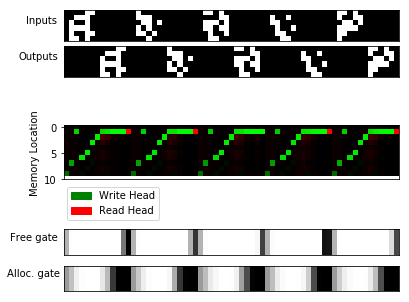

In [9]:
"""
DNC Repeat Copy Task:
Memory size = 10,
Word size   = 10
"""
# shape = (13, 1, 8)
obs = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 0.0, 1.0, 1.0, 0.0, 0.0],
    [1.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
])
# shape = (13, 1, 7)
output = np.array([
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 1.0],
    [0.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [1.0, 1.0, 1.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 1.0, 0.0],
    [0.0, 1.0, 1.0, 1.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 0.0, 1.0, 1.0, 0.0, 0.0],
    [1.0, 0.0, 1.0, 1.0, 1.0, 1.0],
    [0.0, 0.0, 1.0, 0.0, 0.0, 1.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 1.0, 1.0],
    [0.0, 1.0, 0.0, 0.0, 0.0, 1.0],
    [0.0, 0.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],

    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 1.0, 1.0],
    [1.0, 0.0, 1.0, 1.0, 1.0, 0.0],
    [0.0, 0.0, 1.0, 1.0, 0.0, 0.0],
    [1.0, 1.0, 0.0, 1.0, 0.0, 0.0],
    [0.0, 1.0, 1.0, 0.0, 0.0, 0.0],
    [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
])
# shape = (14, 1, 10)
rw = np.array([
    [0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232],
    [0.0430074, 0.0430074, 0.0430074, 0.0430074, 0.0430075, 0.0430115, 0.0431749, 0.0499665, 0.0430074, 0.0455905],
    [0.0259557, 0.0446461, 0.0251746, 0.0251419, 0.0251407, 0.0251513, 0.0255523, 0.0391213, 0.0251405, 0.0282595],
    [0.0118116, 0.0322462, 0.0111014, 0.0110863, 0.0111372, 0.0110939, 0.0353907, 0.0231807, 0.0110859, 0.0154737],
    [0.0074873, 0.0232473, 0.00683476, 0.00685371, 0.00688632, 0.0286394, 0.0277203, 0.0142944, 0.00781952, 0.00977004],
    [0.0109618, 0.0214009, 0.0102793, 0.0271195, 0.0104, 0.0293261, 0.0297935, 0.0152272, 0.0121518, 0.0130447],
    [0.0360221, 0.0450525, 0.0435734, 0.063349, 0.0333782, 0.0599344, 0.0560324, 0.0349612, 0.0420137, 0.0385839],
    [0.0585907, 0.0609596, 0.296567, 0.144563, 0.0419465, 0.0973532, 0.0931104, 0.0365043, 0.0781718, 0.0434049],
    [0.0306877, 0.429804, 0.215897, 0.0972834, 0.0228515, 0.0613816, 0.0444715, 0.0205425, 0.0557362, 0.0178481],
    [0.0140325, 0.771606, 0.0708739, 0.0273007, 0.0133087, 0.0186965, 0.0152558, 0.0131854, 0.0190138, 0.0348667],
    [0.011761, 0.829007, 0.0427386, 0.0209079, 0.0122847, 0.0180794, 0.0174425, 0.00976602, 0.0158795, 0.0209218],
    [0.00297786, 0.950025, 0.0138814, 0.00672637, 0.00333123, 0.00512204, 0.00431792, 0.0025467, 0.0043214, 0.00613102],
    [0.000150876, 0.99602, 0.00132223, 0.00051397, 0.000136155, 0.000281886, 0.000222974, 0.000108688, 0.000233602, 0.000252509],

    [0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232],
    [0.0402291, 0.0402291, 0.0402291, 0.0402291, 0.0402292, 0.0402333, 0.0404041, 0.0475037, 0.0402291, 0.0430106],
    [0.0238263, 0.0412043, 0.0231436, 0.0231168, 0.0231159, 0.0231234, 0.023436, 0.0365503, 0.0231157, 0.0267259],
    [0.0127901, 0.0310156, 0.0122599, 0.0122519, 0.0122928, 0.0122616, 0.0331926, 0.0241707, 0.0122517, 0.0164039],
    [0.00735959, 0.0236123, 0.00669643, 0.0067027, 0.00676935, 0.0250807, 0.0265271, 0.0149942, 0.00748983, 0.0101638],
    [0.0115939, 0.0223512, 0.0108483, 0.0243962, 0.0110369, 0.0285805, 0.0303296, 0.0161463, 0.013056, 0.0136581],
    [0.0287484, 0.0394074, 0.0359127, 0.0522861, 0.0264313, 0.0542278, 0.0509272, 0.0294672, 0.0350124, 0.0294737],
    [0.0624851, 0.0720011, 0.18217, 0.126384, 0.0468919, 0.120092, 0.109113, 0.040424, 0.0912992, 0.0447699],
    [0.043355, 0.370649, 0.17779, 0.102981, 0.0338514, 0.0905102, 0.0675251, 0.022331, 0.0673026, 0.0206361],
    [0.0186506, 0.756181, 0.061744, 0.0300041, 0.0192573, 0.0242347, 0.0193231, 0.0149811, 0.0241751, 0.0297605],
    [0.00368978, 0.948491, 0.0115652, 0.00562415, 0.00414154, 0.00516512, 0.00463662, 0.00329564, 0.0049855, 0.00755443],
    [0.000827545, 0.984764, 0.00447671, 0.0020748, 0.000815664, 0.00176742, 0.00124198, 0.000565129, 0.00144162, 0.00147884],
    [0.000114811, 0.99738, 0.000343813, 0.000188376, 0.00012642, 0.000168161, 0.000133971, 0.000114675, 0.000153842, 0.000212422],

    [0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232],
    [0.0422544, 0.0422544, 0.0422544, 0.0422544, 0.0422545, 0.042258, 0.0424031, 0.0484327, 0.0422544, 0.045088],
    [0.0252636, 0.0422066, 0.0245438, 0.0245132, 0.0245119, 0.0245138, 0.0246593, 0.0366792, 0.0245118, 0.0287736],
    [0.0148395, 0.0320803, 0.0141285, 0.0141019, 0.0141469, 0.0141062, 0.0334613, 0.0249434, 0.0141009, 0.0187513],
    [0.0101997, 0.0253032, 0.00955385, 0.00956825, 0.00965447, 0.0278565, 0.0293352, 0.0170123, 0.0104486, 0.013056],
    [0.0120372, 0.0228458, 0.011532, 0.027303, 0.0116866, 0.0321861, 0.0309482, 0.0169397, 0.0143562, 0.0143236],
    [0.0304295, 0.0385071, 0.0397625, 0.0621657, 0.0291619, 0.0595743, 0.0517441, 0.0329843, 0.0398667, 0.0319979],
    [0.0526831, 0.0503006, 0.257029, 0.144336, 0.0422179, 0.112997, 0.0891717, 0.0394055, 0.0855978, 0.0381357],
    [0.0446763, 0.351478, 0.193449, 0.104454, 0.0392959, 0.0843227, 0.0570712, 0.0253062, 0.0698829, 0.0263429],
    [0.0100135, 0.814856, 0.0652277, 0.0238556, 0.009455, 0.0176531, 0.01098, 0.00591401, 0.0153895, 0.0260438],
    [0.006108, 0.885864, 0.0387039, 0.0157659, 0.00540014, 0.0135242, 0.0107003, 0.00374377, 0.010638, 0.00899819],
    [0.0157261, 0.68607, 0.102421, 0.0519985, 0.0135997, 0.0411439, 0.0305141, 0.00990519, 0.030408, 0.0174931],
    [0.000338986, 0.994153, 0.0014257, 0.000602523, 0.000365196, 0.000473295, 0.000389231, 0.000377982, 0.000396805, 0.000592993],

    [0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232],
    [0.0481272, 0.0481272, 0.0481272, 0.0481272, 0.0481273, 0.0481304, 0.048262, 0.0537309, 0.0481272, 0.0508426],
    [0.0240617, 0.0435438, 0.0232324, 0.0231971, 0.0231957, 0.0232009, 0.0234613, 0.037976, 0.0231956, 0.0277156],
    [0.0136995, 0.0317078, 0.0128119, 0.0127686, 0.012816, 0.0127723, 0.0341827, 0.0237428, 0.0127668, 0.0169835],
    [0.0118547, 0.0266977, 0.0110105, 0.010997, 0.0111725, 0.0292476, 0.0311178, 0.0182331, 0.0118444, 0.0143258],
    [0.0169888, 0.0282124, 0.0163, 0.0319953, 0.0165586, 0.0383183, 0.0373589, 0.0218641, 0.0199167, 0.0193109],
    [0.0470106, 0.054568, 0.0554602, 0.077361, 0.0467131, 0.0725707, 0.0685331, 0.0512027, 0.0550391, 0.0504792],
    [0.0679874, 0.0649301, 0.228396, 0.129175, 0.0624124, 0.101696, 0.0970024, 0.0627482, 0.0861228, 0.0614203],
    [0.0344309, 0.425112, 0.1876, 0.0869203, 0.0362472, 0.0680734, 0.0515265, 0.0226821, 0.0532543, 0.0273488],
    [0.0129132, 0.742329, 0.0795628, 0.0323569, 0.0144641, 0.0242866, 0.0183433, 0.0106135, 0.0195056, 0.0446578],
    [0.00114608, 0.975156, 0.00949787, 0.00283481, 0.00112589, 0.00227779, 0.00210163, 0.000775497, 0.00167768, 0.00285602],
    [0.00160408, 0.973049, 0.00847774, 0.00286829, 0.00173761, 0.00222753, 0.00200198, 0.00157816, 0.00188119, 0.00296836],
    [7.10513e-05, 0.99773, 0.000376076, 0.000139869, 7.99543e-05, 0.000102864, 8.81887e-05, 7.95468e-05, 8.53571e-05, 0.000133552],

    [0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232, 0.0474232],
    [0.0418705, 0.0418705, 0.0418705, 0.0418705, 0.0418706, 0.0418749, 0.042053, 0.0494526, 0.0418705, 0.0445764],
    [0.0199489, 0.0393537, 0.019202, 0.0191733, 0.0191724, 0.0191855, 0.01966, 0.0348808, 0.0191721, 0.0226798],
    [0.0122043, 0.0289385, 0.0115361, 0.0115106, 0.0115447, 0.0115199, 0.0299546, 0.0233075, 0.0115097, 0.0154041],
    [0.00946162, 0.0245613, 0.00882948, 0.00882982, 0.00892199, 0.0244711, 0.0266118, 0.0170484, 0.00950577, 0.0120854],
    [0.0149551, 0.0266135, 0.0143347, 0.0258133, 0.0145068, 0.0320495, 0.0332846, 0.0208522, 0.0171985, 0.0172436],
    [0.0437112, 0.0532565, 0.0484684, 0.0718145, 0.0419319, 0.0725447, 0.0668498, 0.0448474, 0.0543525, 0.0446454],
    [0.0665165, 0.0649249, 0.245981, 0.128075, 0.0584745, 0.112701, 0.0968751, 0.0549076, 0.0928728, 0.0509158],
    [0.0392413, 0.414279, 0.194431, 0.0852646, 0.0347974, 0.0668891, 0.0449311, 0.0317475, 0.0612192, 0.0242425],
    [0.00957179, 0.802577, 0.0779402, 0.0223373, 0.00925261, 0.0163352, 0.00991466, 0.00884538, 0.015586, 0.0268956],
    [0.00307999, 0.945541, 0.0175758, 0.00623064, 0.00245775, 0.00621536, 0.00564152, 0.00171845, 0.00507106, 0.00587876],
    [0.00292227, 0.94772, 0.0162012, 0.00708342, 0.00225133, 0.0063597, 0.00549081, 0.00152674, 0.00488232, 0.00451362],
    [4.99095e-05, 0.998401, 0.00027658, 9.2842e-05, 5.25416e-05, 7.86025e-05, 6.6345e-05, 5.04652e-05, 6.78343e-05, 0.000130271],
])
# shape = (14, 10)
ww = np.array([
    [0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252571, 0.416141],
    [0.0200903, 0.0200903, 0.0200903, 0.0200905, 0.0200989, 0.020447, 0.0349155, 0.636187, 0.0200903, 0.0200901],
    [0.0402731, 0.836108, 0.00701361, 0.00562363, 0.0055629, 0.00556072, 0.00543287, 0.00521874, 0.00556302, 0.006402],
    [0.000948648, 0.000895204, 0.00114827, 0.00107416, 0.00298761, 0.00107527, 0.907496, 0.00114387, 0.00107461, 0.0428014],
    [0.000125273, 0.000211563, 0.000137572, 0.00215957, 0.000140469, 0.936235, 0.000112275, 0.000146891, 0.0436112, 0.000135846],
    [0.00228329, 0.000131274, 0.00025622, 0.938604, 0.000153568, 0.000132526, 0.000119296, 0.0448657, 0.000137573, 0.000162145],
    [0.00260193, 0.000480934, 0.94116, 0.000630072, 0.00066925, 0.000665819, 0.0450567, 0.000699478, 0.00066596, 0.000935693],
    [0.00140822, 0.862024, 0.0459489, 0.0235905, 0.00088667, 0.0496327, 0.00373458, 0.00091786, 0.00615075, 0.00404884],
    [7.50143e-05, 0.915057, 0.0450226, 0.0048567, 1.83538e-05, 0.00328077, 0.000231334, 0.000137198, 0.000534985, 0.0305307],
    [1.11716e-05, 0.988587, 0.00139203, 4.24688e-05, 0.000659888, 7.11931e-06, 0.00910551, 3.49019e-05, 7.64018e-06, 1.8872e-05],
    [2.6195e-07, 0.99924, 6.02731e-05, 0.000198114, 7.60738e-08, 1.43248e-05, 2.30831e-07, 9.15854e-07, 3.13336e-07, 1.84632e-06],
    [2.23336e-08, 0.996893, 9.90821e-07, 1.24843e-05, 9.8052e-09, 8.95504e-07, 1.31286e-08, 5.26304e-08, 1.68526e-08, 1.07998e-07],
    [2.92869e-08, 0.992226, 1.06682e-08, 1.87091e-09, 2.24544e-05, 1.58779e-06, 2.27678e-09, 8.41284e-08, 4.62558e-09, 1.57996e-08],

    [0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252571, 0.416141],
    [0.0172856, 0.0172856, 0.0172856, 0.0172858, 0.0172943, 0.0176479, 0.0323446, 0.643102, 0.0172856, 0.0172855],
    [0.0382763, 0.820376, 0.00755063, 0.00634354, 0.00629401, 0.00628921, 0.00611176, 0.00582801, 0.00629419, 0.00715014],
    [0.00109492, 0.00108006, 0.00120438, 0.00112871, 0.00291089, 0.00112929, 0.909763, 0.0011883, 0.00112868, 0.0413408],
    [0.000302494, 0.000386164, 0.000298194, 0.00213669, 0.000301202, 0.915746, 0.000286584, 0.000305541, 0.0413152, 0.000282826],
    [0.00217772, 0.000206346, 0.000303706, 0.922744, 0.000211816, 0.000184702, 0.000182304, 0.0426567, 0.000191877, 0.000209105],
    [0.00229667, 0.000380823, 0.930241, 0.000364913, 0.000417969, 0.000332198, 0.0429023, 0.000444299, 0.000350673, 0.000567663],
    [0.00255627, 0.917266, 0.00718197, 0.00546893, 0.00227454, 0.0439088, 0.00291047, 0.00221094, 0.00329822, 0.00553123],
    [0.00123158, 0.894253, 0.0503312, 0.0104697, 0.00089158, 0.00541406, 0.00205988, 0.00234205, 0.00312186, 0.0287529],
    [1.80403e-05, 0.989748, 0.000290862, 2.60773e-05, 1.58694e-05, 0.000641178, 0.00885916, 4.91085e-06, 2.68278e-05, 0.000192745],
    [3.04701e-07, 0.999177, 2.24556e-06, 0.000347393, 2.93896e-08, 1.35901e-07, 2.40551e-05, 8.07236e-08, 1.49396e-06, 2.93143e-07],
    [3.50556e-08, 0.997233, 8.41323e-08, 2.94801e-05, 4.07585e-08, 1.6415e-08, 2.04384e-06, 3.88951e-08, 1.54137e-07, 2.27682e-07],
    [5.94468e-08, 0.994333, 8.02771e-08, 3.33909e-05, 4.43204e-08, 2.38582e-08, 2.31504e-06, 6.46324e-08, 1.51545e-07, 1.13656e-07],

    [0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252571, 0.416141],
    [0.0207945, 0.0207945, 0.0207945, 0.0207947, 0.0208025, 0.0211277, 0.034638, 0.596057, 0.0207945, 0.0207943],
    [0.0414046, 0.799529, 0.00919599, 0.00782761, 0.00776663, 0.00775789, 0.0074398, 0.00682568, 0.00776692, 0.00988513],
    [0.00250657, 0.00235301, 0.00287086, 0.00280029, 0.00486245, 0.00280153, 0.871797, 0.00278755, 0.00280146, 0.0458469],
    [0.000484464, 0.000609735, 0.000475518, 0.00283946, 0.000480123, 0.922142, 0.00045518, 0.000461044, 0.0471438, 0.000471735],
    [0.00278979, 0.000259238, 0.00039343, 0.929521, 0.000258201, 0.000199756, 0.00020359, 0.0485373, 0.000213196, 0.000264971],
    [0.00319666, 0.000774815, 0.929869, 0.000521347, 0.000800929, 0.000512459, 0.0485644, 0.000842006, 0.000573522, 0.00101113],
    [0.00424273, 0.890564, 0.0147738, 0.012624, 0.00290124, 0.0511391, 0.00440388, 0.00339941, 0.00596408, 0.00558433],
    [0.00017927, 0.911081, 0.0486589, 0.00450361, 9.92391e-05, 0.00389822, 0.000337773, 0.000162752, 0.000769232, 0.0298882],
    [1.95465e-05, 0.984189, 0.000806071, 3.14557e-05, 3.34791e-06, 0.00108384, 0.0137029, 5.93744e-05, 1.10281e-05, 2.77417e-05],
    [7.1372e-07, 0.998763, 9.67444e-05, 0.000868473, 2.67073e-08, 1.17039e-06, 6.72114e-05, 4.79451e-06, 5.02945e-07, 3.1685e-07],
    [4.9373e-08, 0.998906, 1.33066e-05, 4.47354e-05, 1.55555e-08, 2.72734e-07, 3.48137e-06, 2.62014e-07, 1.44041e-07, 1.57121e-07],
    [4.64663e-08, 0.995016, 6.95382e-07, 8.62804e-08, 7.14762e-07, 6.37454e-08, 8.87755e-06, 7.01926e-08, 5.7767e-08, 1.87004e-07],

    [0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252571, 0.416141],
    [0.0211602, 0.0211602, 0.0211602, 0.0211604, 0.0211685, 0.0215036, 0.0354285, 0.61406, 0.0211602, 0.02116],
    [0.0405717, 0.801888, 0.00816666, 0.00678735, 0.00672588, 0.00672264, 0.00655683, 0.00623733, 0.00672604, 0.00779391],
    [0.00154482, 0.00148702, 0.00174089, 0.0016555, 0.00367055, 0.0016558, 0.88087, 0.00165188, 0.00165579, 0.0439528],
    [0.000351686, 0.000448439, 0.000362301, 0.00254084, 0.000363339, 0.913549, 0.000304574, 0.000360528, 0.0449362, 0.000368708],
    [0.00261615, 0.000289557, 0.000428479, 0.920227, 0.000309265, 0.000245524, 0.000246103, 0.0462933, 0.000261489, 0.000332964],
    [0.00281136, 0.000577804, 0.927459, 0.000392762, 0.00064802, 0.000450284, 0.0463989, 0.000602918, 0.000494145, 0.000921203],
    [0.00332655, 0.91342, 0.00499269, 0.00487287, 0.00294037, 0.0470222, 0.00380376, 0.00248614, 0.00410541, 0.00666331],
    [0.000101729, 0.938526, 0.0199573, 0.00163599, 6.86892e-05, 0.00324902, 0.000226141, 0.000168506, 0.000263026, 0.0353706],
    [1.91748e-05, 0.984536, 0.00143321, 6.00667e-05, 9.51456e-06, 0.000952448, 0.012609, 5.58755e-06, 6.35453e-05, 0.000250223],
    [4.83987e-07, 0.999285, 5.39121e-06, 0.000456565, 5.11847e-08, 1.26072e-07, 3.32564e-05, 2.01844e-06, 1.20776e-07, 1.00401e-06],
    [3.35271e-08, 0.996339, 4.30098e-07, 1.9495e-05, 1.02446e-08, 1.97461e-08, 1.42889e-06, 8.10863e-08, 1.59096e-08, 8.82989e-08],
    [2.5369e-08, 0.99449, 9.03881e-09, 1.88462e-05, 1.76372e-09, 2.05087e-09, 1.36855e-06, 7.49408e-08, 3.91962e-09, 1.09718e-08],

    [0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252567, 0.0252571, 0.416141],
    [0.0165057, 0.0165057, 0.0165057, 0.0165059, 0.0165149, 0.0168874, 0.0323674, 0.675706, 0.0165057, 0.0165056],
    [0.0373442, 0.816838, 0.00734238, 0.00618764, 0.00614129, 0.00613787, 0.00600807, 0.00582845, 0.00614143, 0.00678556],
    [0.00211402, 0.00200717, 0.00237499, 0.00232178, 0.00399287, 0.00232482, 0.883259, 0.00253608, 0.00232246, 0.0407315],
    [0.000374771, 0.000459628, 0.000370689, 0.00226977, 0.000373693, 0.928251, 0.000348768, 0.000391226, 0.0423432, 0.000337319],
    [0.00228987, 0.000264372, 0.000378271, 0.932635, 0.00028163, 0.000220805, 0.000221081, 0.0435035, 0.000236605, 0.000278648],
    [0.00275467, 0.000810159, 0.936428, 0.000731606, 0.000839561, 0.000687519, 0.0436994, 0.0009135, 0.000720959, 0.000981701],
    [0.00253629, 0.873409, 0.0386994, 0.018719, 0.00120971, 0.0479334, 0.00507027, 0.000973822, 0.00556383, 0.00342133],
    [6.43978e-05, 0.945422, 0.0204762, 0.000914553, 2.3719e-05, 0.00242877, 7.86553e-05, 1.76856e-05, 0.000326893, 0.0299166],
    [1.14291e-05, 0.986487, 0.000573827, 1.46014e-05, 1.62854e-06, 0.00082027, 0.0119646, 2.94151e-06, 4.42429e-05, 1.63653e-05],
    [2.59403e-07, 0.99926, 4.99336e-05, 0.00033444, 1.57337e-08, 2.35251e-05, 2.92309e-07, 3.1567e-08, 1.86297e-06, 3.68279e-07],
    [1.74516e-08, 0.998022, 1.78386e-06, 2.64996e-05, 5.30315e-09, 1.82907e-06, 2.23254e-08, 4.17253e-09, 1.58485e-07, 1.01142e-07],
    [2.80191e-08, 0.995896, 1.96937e-07, 1.16295e-05, 2.29385e-08, 8.00165e-07, 1.8722e-08, 3.28327e-08, 6.38544e-08, 9.99517e-08],
])
# shape = (14, 1)
fg = np.array([
    0.895327, 0.997408, 0.999949, 0.999993, 0.999997, 0.999985, 0.999974, 0.999967, 0.999997, 0.999998, 0.999134, 0.813897, 0.649832,

    0.895327, 0.997472, 0.999922, 0.999995, 0.999984, 0.999925, 0.999794, 0.999755, 0.99996, 0.999997, 0.999643, 0.89702, 0.723008,

    0.895327, 0.996124, 0.999918, 0.999979, 0.999991, 0.999977, 0.999889, 0.999878, 0.999993, 1.0, 0.999953, 0.988629, 0.738544,

    0.895327, 0.995508, 0.999884, 0.999978, 0.999984, 0.999957, 0.999913, 0.999927, 0.999997, 0.999999, 0.999827, 0.673368, 0.678699,

    0.895327, 0.99822, 0.999935, 0.99998, 0.999989, 0.99995, 0.999879, 0.999926, 0.999998, 1.0, 0.999773, 0.949522, 0.748592,
])
# shape = (14, 1)
ag = np.array([
    0.60748, 0.758585, 0.939324, 0.988965, 0.99865, 0.99854, 0.993671, 0.904575, 0.724298, 0.220434, 0.00475815, 0.000304384, 0.000553134,

    0.60748, 0.787674, 0.930652, 0.988305, 0.996912, 0.997897, 0.996061, 0.965309, 0.672696, 0.213679, 0.00853838, 0.00072867, 0.000827988,

    0.60748, 0.739219, 0.91329, 0.970313, 0.995148, 0.997516, 0.992962, 0.938597, 0.62786, 0.298046, 0.0189881, 0.000975444, 0.000197622,

    0.60748, 0.741672, 0.924665, 0.982478, 0.99633, 0.997005, 0.994285, 0.961908, 0.800833, 0.294821, 0.0108253, 0.000463548, 0.000450187,

    0.60748, 0.803623, 0.931908, 0.975619, 0.996233, 0.997299, 0.992058, 0.913483, 0.738432, 0.304878, 0.00855643, 0.000681993, 0.000300502,
])

display(obs, output, {
    'read_weights': rw,
    'write_weights': ww,
    'free_gate': fg,
    'allocation_gate': ag,
})